###  MicroGrad demo

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [3]:
np.random.seed(1337)
random.seed(1337)

In [4]:
# make up a dataset
from sklearn.datasets import make_moons, make_blobs, load_digits, fetch_openml
#X, y = fetch_openml('mnist_784',return_X_y=True)
X, y = load_digits(return_X_y=True)

In [5]:
y = y.astype(np.int)
y_oh = np.zeros((y.shape[0], y.max()+1))
y_oh[np.arange(y.shape[0]),y] = 1
y_oh = y_oh*1.1 - 0.1 # make y_oh be -0.1 or 1

(1797, 64) (1797, 10)


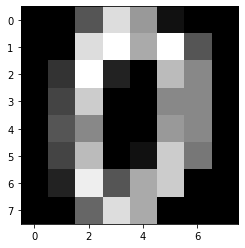

In [6]:
print(X.shape, y_oh.shape)
plt.imshow(X[0].reshape(8,8), cmap='gray')

In [7]:
# initialize a model 
model = MLP(64, [16, 10]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64), ReLUNeuron(64)], Layer of [LinearNeuron(16), LinearNeuron(16), LinearNeuron(16), LinearNeuron(16), LinearNeuron(16), LinearNeuron(16), LinearNeuron(16), LinearNeuron(16), LinearNeuron(16), LinearNeuron(16)]]
number of parameters 1210


In [8]:
# argmax
def argmax(values):
    return max(enumerate(values), key=lambda x: x[1])[0]

# loss function
def loss(batch_size=None):
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y_oh
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y_oh[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [sum(((1 + -yic*scoreic).relu() for yic,scoreic in zip(yi, scorei))) for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [yi.argmax() == argmax([scoreic.data for scoreic in scorei]) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=64.00688247438974, grad=0) 0.1296605453533667


In [9]:
# optimization
step_cnt = 1000
for k in range(step_cnt):
    
    # forward
    total_loss, acc = loss(batch_size=128)
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 0.1* (1.0 - 0.9*k/step_cnt)
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

        
total_loss, acc = loss()
print(total_loss, acc)

step 0 loss 56.69842273085016, accuracy 14.0625%
step 1 loss 37.90824259965874, accuracy 19.53125%
step 2 loss 25.249149698360693, accuracy 25.78125%
step 3 loss 11.351464159095478, accuracy 36.71875%
step 4 loss 11.406599920156726, accuracy 21.09375%
step 5 loss 10.274761907965976, accuracy 21.09375%
step 6 loss 9.264822422031047, accuracy 25.0%
step 7 loss 9.345076161491319, accuracy 29.6875%
step 8 loss 8.668700463731506, accuracy 27.34375%
step 9 loss 8.403121814324617, accuracy 31.25%
step 10 loss 8.396698927574015, accuracy 28.90625%
step 11 loss 7.8010737812719695, accuracy 25.0%
step 12 loss 6.90986105248893, accuracy 24.21875%
step 13 loss 7.975404871945863, accuracy 28.125%
step 14 loss 8.909172016504721, accuracy 34.375%
step 15 loss 8.798911775964157, accuracy 29.6875%
step 16 loss 7.718016852618044, accuracy 30.46875%
step 17 loss 6.527810471850269, accuracy 45.3125%
step 18 loss 6.3277266249978945, accuracy 28.90625%
step 19 loss 6.063916892197813, accuracy 32.03125%
step

step 162 loss 2.3645174100417186, accuracy 85.15625%
step 163 loss 1.9762744812192548, accuracy 83.59375%
step 164 loss 1.9460810217795719, accuracy 82.03125%
step 165 loss 3.1758259170424017, accuracy 71.875%
step 166 loss 2.6205436224134058, accuracy 64.84375%
step 167 loss 2.404855911900625, accuracy 72.65625%
step 168 loss 2.3158536385324333, accuracy 81.25%
step 169 loss 2.0769298006406776, accuracy 81.25%
step 170 loss 2.4662849915329192, accuracy 78.125%
step 171 loss 2.6259693365773735, accuracy 75.78125%
step 172 loss 2.990187636921771, accuracy 76.5625%
step 173 loss 2.6652561231140677, accuracy 72.65625%
step 174 loss 2.664970413331088, accuracy 71.09375%
step 175 loss 2.309906480645282, accuracy 79.6875%
step 176 loss 2.6361216911010894, accuracy 64.84375%
step 177 loss 2.6097170243957106, accuracy 70.3125%
step 178 loss 2.2776435193249975, accuracy 75.0%
step 179 loss 2.412295125382963, accuracy 83.59375%
step 180 loss 2.5111388583928953, accuracy 74.21875%
step 181 loss 1

step 321 loss 1.3274227231098636, accuracy 85.9375%
step 322 loss 1.5689650789129967, accuracy 77.34375%
step 323 loss 1.319739895589189, accuracy 89.0625%
step 324 loss 2.1685022664879186, accuracy 71.09375%
step 325 loss 1.9139379542067172, accuracy 80.46875%
step 326 loss 1.603886113999393, accuracy 81.25%
step 327 loss 1.1446826893362987, accuracy 88.28125%
step 328 loss 1.8966468075367864, accuracy 80.46875%
step 329 loss 1.8381610315986294, accuracy 82.03125%
step 330 loss 1.361597356847657, accuracy 90.625%
step 331 loss 1.5619178999702832, accuracy 88.28125%
step 332 loss 1.9026697308756049, accuracy 87.5%
step 333 loss 1.3372642492511422, accuracy 88.28125%
step 334 loss 1.3062420364139902, accuracy 92.96875%
step 335 loss 1.6236960751103116, accuracy 83.59375%
step 336 loss 1.540730941633041, accuracy 83.59375%
step 337 loss 1.372628348543106, accuracy 84.375%
step 338 loss 1.68212438202574, accuracy 83.59375%
step 339 loss 1.288919130948952, accuracy 91.40625%
step 340 loss 

step 480 loss 1.4249955974539512, accuracy 92.96875%
step 481 loss 1.4983799076183435, accuracy 91.40625%
step 482 loss 1.2724925822466113, accuracy 89.84375%
step 483 loss 1.4355395831335636, accuracy 91.40625%
step 484 loss 1.2865087311224839, accuracy 89.84375%
step 485 loss 1.3652772298033988, accuracy 84.375%
step 486 loss 1.1139614125220954, accuracy 90.625%
step 487 loss 1.120861653218496, accuracy 92.1875%
step 488 loss 0.8173142420244355, accuracy 95.3125%
step 489 loss 0.8916620499067851, accuracy 92.1875%
step 490 loss 1.2696667856776844, accuracy 92.96875%
step 491 loss 1.1251602149848396, accuracy 90.625%
step 492 loss 1.1010300998626423, accuracy 91.40625%
step 493 loss 1.2713533464244027, accuracy 91.40625%
step 494 loss 1.010548791773961, accuracy 92.1875%
step 495 loss 1.0420128264495103, accuracy 89.84375%
step 496 loss 1.1603413689262028, accuracy 91.40625%
step 497 loss 1.3617732172851793, accuracy 93.75%
step 498 loss 1.2095392299092746, accuracy 92.1875%
step 499 

step 639 loss 1.0912831260007954, accuracy 85.9375%
step 640 loss 0.8845274222391188, accuracy 92.1875%
step 641 loss 0.9015016597484352, accuracy 91.40625%
step 642 loss 0.8929357683089868, accuracy 89.84375%
step 643 loss 0.8565635518122442, accuracy 94.53125%
step 644 loss 0.9228364503475575, accuracy 93.75%
step 645 loss 0.8902096339388743, accuracy 91.40625%
step 646 loss 1.0298979806356814, accuracy 92.96875%
step 647 loss 1.214635599739288, accuracy 94.53125%
step 648 loss 0.9556022896273436, accuracy 91.40625%
step 649 loss 1.1103138702524593, accuracy 93.75%
step 650 loss 0.924563482684136, accuracy 91.40625%
step 651 loss 1.1613921560564833, accuracy 91.40625%
step 652 loss 1.071450920611189, accuracy 91.40625%
step 653 loss 0.905630699710606, accuracy 89.84375%
step 654 loss 1.2631464693008334, accuracy 91.40625%
step 655 loss 0.8250037310701367, accuracy 93.75%
step 656 loss 0.8214013315493914, accuracy 95.3125%
step 657 loss 0.7517068466889684, accuracy 96.09375%
step 658 

step 796 loss 1.3433942999672297, accuracy 93.75%
step 797 loss 0.7530835075477944, accuracy 94.53125%
step 798 loss 0.8161709218979117, accuracy 93.75%
step 799 loss 0.9347320747442456, accuracy 92.96875%
step 800 loss 0.7213828644371458, accuracy 95.3125%
step 801 loss 1.0363707516260259, accuracy 93.75%
step 802 loss 0.8646897858716381, accuracy 94.53125%
step 803 loss 0.9380643860055061, accuracy 94.53125%
step 804 loss 1.117420239266518, accuracy 92.96875%
step 805 loss 0.9261318151891413, accuracy 92.1875%
step 806 loss 0.8112583634345102, accuracy 92.96875%
step 807 loss 0.6292417982206188, accuracy 97.65625%
step 808 loss 0.9765245143113966, accuracy 93.75%
step 809 loss 0.7201725245197792, accuracy 96.09375%
step 810 loss 1.0191231483764922, accuracy 94.53125%
step 811 loss 0.7639456149953161, accuracy 92.96875%
step 812 loss 0.6630475272130633, accuracy 96.09375%
step 813 loss 1.0109810933115588, accuracy 96.09375%
step 814 loss 0.8331888853352659, accuracy 90.625%
step 815 l

step 954 loss 0.6355142528775524, accuracy 96.09375%
step 955 loss 0.9275991270422779, accuracy 92.96875%
step 956 loss 0.7902841892324917, accuracy 94.53125%
step 957 loss 0.49097852966744776, accuracy 97.65625%
step 958 loss 0.8969219322969099, accuracy 94.53125%
step 959 loss 0.5378341756093855, accuracy 96.875%
step 960 loss 0.9112755079101527, accuracy 92.96875%
step 961 loss 0.6958480226915444, accuracy 92.96875%
step 962 loss 0.7134680972761396, accuracy 92.96875%
step 963 loss 0.7755068241587127, accuracy 94.53125%
step 964 loss 0.7940711940976808, accuracy 92.96875%
step 965 loss 0.7556470502996749, accuracy 93.75%
step 966 loss 0.6787043619353003, accuracy 93.75%
step 967 loss 0.8293779842856203, accuracy 93.75%
step 968 loss 0.6744806379305307, accuracy 97.65625%
step 969 loss 0.8971622199369838, accuracy 94.53125%
step 970 loss 0.8379861106495573, accuracy 94.53125%
step 971 loss 0.8698520841724567, accuracy 93.75%
step 972 loss 0.677281582309532, accuracy 96.09375%
step 97